<a href="https://colab.research.google.com/github/chaihermes/analise_componentes_principais/blob/main/Case_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O que é o PCA?**
Na área de análise de dados, frequentemente nos deparamos com o desafio de lidar com uma grande quantidade de informações. Quando iniciamos um projeto de análise, especialmente na fase de exploração, muitas vezes nos deparamos com um grande número de características interessantes que podem ser utilizadas para treinar modelos, criar dashboards ou identificar padrões. Surge a pergunta: quais características são realmente relevantes para a análise?

É nesse contexto que entra o PCA (Análise de Componentes Principais), uma técnica introduzida por Karl Pearson em 1909. O principal objetivo do PCA é reduzir a complexidade de conjuntos de dados com várias variáveis, ajudando a identificar as características mais essenciais, ou seja, aquelas que capturam a maior parte da variação nos dados (ou o quão diferentes os dados estão da média).

Em resumo, o PCA possibilita uma representação mais concisa dos dados, eliminando informações menos cruciais e mantendo as que têm maior importância para a análise e interpretação. É importante notar que o PCA não exclui diretamente as características que estamos analisando, mas sim nos auxilia a focar nas mais relevantes para nossos objetivos.

**Utilizando o PCA com um Conjunto de Dados de Exemplo em Python**

In [ ]:
# Vamos então trabalhar com um exemplo clássico para entendermos melhor o coneito na prática!
# Vamos importar o dataset iris
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df  = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# A seguir, iremos separar todas as colunas na lista de 'recursos' para uma variável 'X' e a variável 'destino' para 'y'.
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['Target'].values

**Porque padronizar as variáveis?**

A padronização de variáveis é um processo crucial ao aplicar a Análise de Componentes Principais (PCA), uma técnica sensível à escala. Se as unidades de medida das variáveis diferem, aquelas com magnitudes mais elevadas podem distorcer a análise.

Por exemplo, em um conjunto de dados com distâncias em metros e valores em milhares, a segunda variável, devido à sua amplitude maior, pode ter uma influência desproporcional na variabilidade total durante o PCA. A padronização, frequentemente realizada por meio da **normalização z,** é um procedimento que ajusta as variáveis de um conjunto de dados para que todas possuam uma média de zero e um desvio padrão de um.

A normalização z transforma cada variável de forma que sua distribuição seja centrada na média zero e escalada pelo desvio padrão.

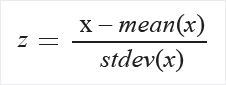

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalizando os dados utilizando o standarScaler
# Padroniza as features removendo a média e escala a variância a uma unidade.
# Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1.

X = StandardScaler().fit_transform(X)
# Visualizando nossos dados padronizados
df_padronizado = pd.DataFrame(data=X, columns=features)
display(df_padronizado.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Agora, importaremos o PCA usando o Sklearn e projetamos nossos dados originais, que possuem 4 dimensões, em 2 dimensões (ou também chamados de componenetes principais).

In [ ]:
# Importando o PCS da biblioteca sklearn
from sklearn.decomposition import PCA
# Instanciando o pca e a quantidade de componenetes que desejamos obter
pca = PCA(n_components=2)
# Ampliando PCA nas nossas features
principalComponents = pca.fit_transform(X)

In [ ]:
# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
target = pd.Series(iris['target'], name='target')
result_df = pd.concat([df_pca, target], axis=1)
result_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


**Métrica estatística sobre qualidade da minha redução de componentes**

"A técnica do PCA parece muito interessante! No entanto, como posso ter certeza de que o PCA não está omitindo informações essenciais para o meu modelo?"

Para esclarecer essa preocupação, utilizamos uma técnica chamada "Razão de Variância Explicada" (Explained Variance Ratio). Essa métrica estatística quantifica o quanto de variação em um conjunto de dados pode ser atribuído a cada um dos componentes principais (que são criados pelo PCA) em relação à média. Isso é fundamental, pois nos permite classificar os componentes por ordem de importância e concentrar nossa atenção nos mais significativos ao interpretar os resultados da análise.

A variância explicada é uma ferramenta que ajuda a escolher quantas dimensões devem ser mantidas em um conjunto de dados reduzido. Além disso, ela também pode ser usada para avaliar a qualidade de um modelo de aprendizado de máquina. Em geral, um modelo com uma alta variância explicada tende a ter um bom poder de previsão, enquanto um modelo com uma baixa variância explicada pode não ser tão preciso. No entanto, é importante lembrar que a interpretação depende da pergunta que estamos tentando responder com os dados.

**Vamos olhar agora como ficou a variabilidade de cada componente principal, ou seja, o quanto cada coluna gerada a partir do PCA estão próximos/distantes da média dos nossos dados.**

In [ ]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 95.81


O que significam esses valores?

Se você tem um PC1 de 0.72962445, isso significa que o primeiro componente principal da sua análise é responsável por aproximadamente 72.96% da variância nos seus dados. Em outras palavras, esse único componente principal captura cerca de 72.96% da informação ou "estrutura" dos seus dados em termos de variância. Os restantes da variância são capturados pelos outros componentes principais (PC2, PC3, etc.).

Por que a soma não chega a 100%?

A razão pela qual não soma a 100% é devido à existência de mais componentes principais que explicam o restante da variância. No entanto, esses componentes adicionais são frequentemente desconsiderados na prática, pois contribuem muito pouco para a interpretação dos dados.

A ideia subjacente à PCA é reduzir a dimensionalidade dos seus dados, mantendo a maior parte da informação (variância). Portanto, geralmente é aceitável ignorar esses componentes adicionais se eles não contribuírem de forma significativa para a variância total.

Uau, mas como ele faz isso utilizando apenas a variância dos nossos dados?

Imagine que você possui um conjunto de dados distribuídos no espaço. A Análise de Componentes Principais (PCA) equivale a encontrar a melhor linha reta onde você pode projetar esses pontos de forma que fiquem o mais próximos possível dessa linha. Essa linha é o que chamamos de primeiro componente principal. Se desejar adicionar outra dimensão, é possível encontrar a melhor linha reta que seja perpendicular à primeira, onde você pode projetar os pontos. Isso corresponderia ao segundo componente principal, e o processo continua para mais dimensões. Cada uma dessas "linhas" captura uma parte da "informação" contida nos seus dados, e isso é mensurado pela variância ao longo dessa linha.

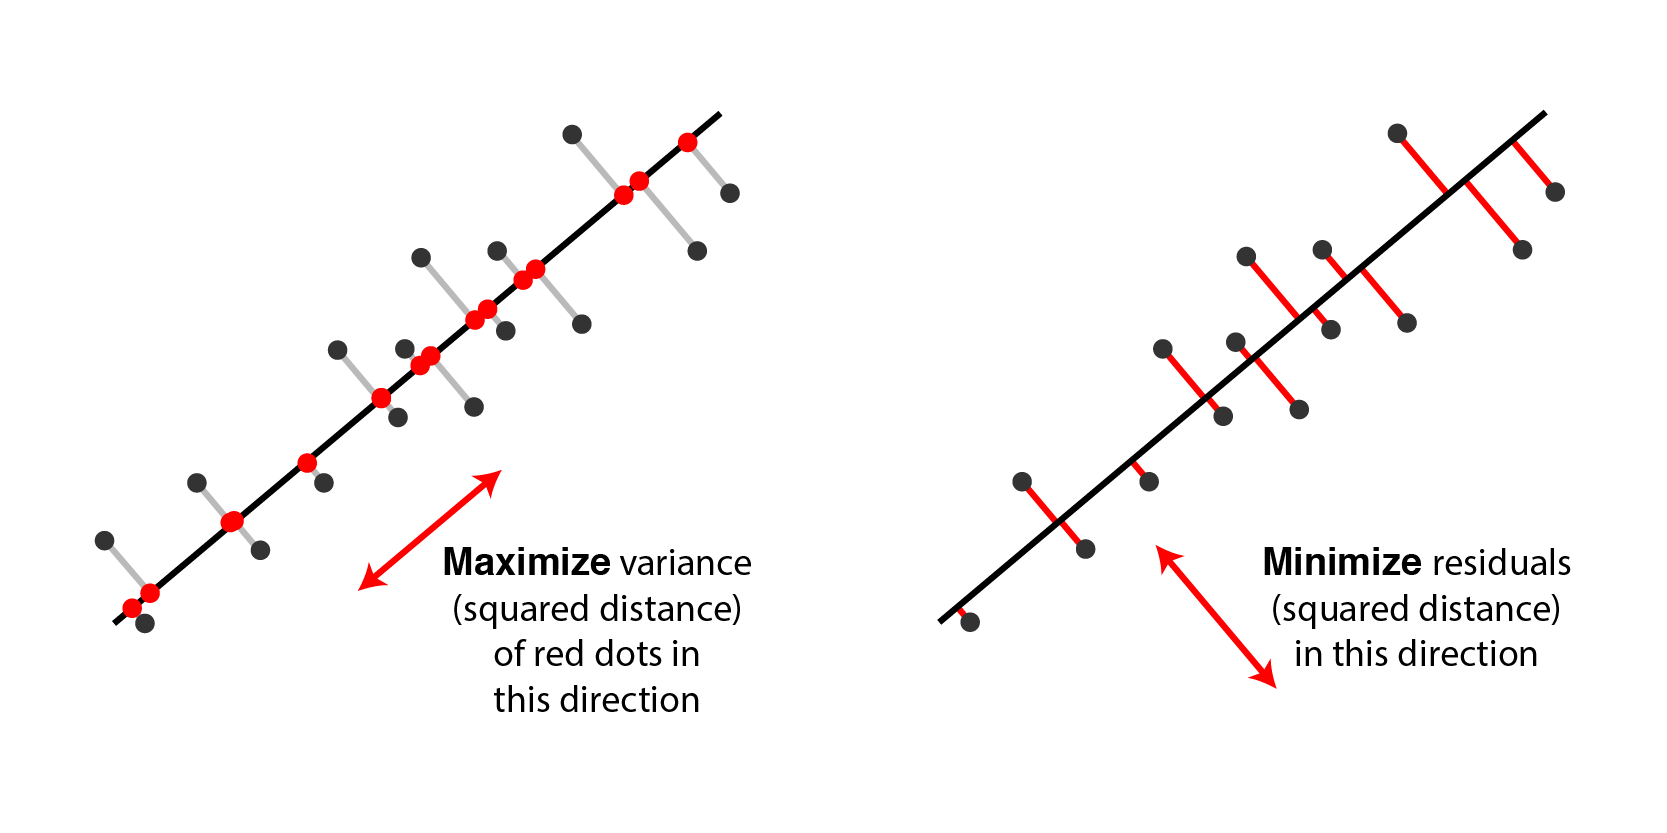

Vamos traduzir para um contexto matemático mais técnico!

Essas linhas que representam as informações são denominadas autovetores. Cada autovetor possui um autovalor correspondente, que indica a quantidade de informação capturada por essa linha, ou seja, os pontos que ela atravessa.

Portanto, ao aplicar o PCA, nosso objetivo é identificar os melhores autovetores, onde cada autovalor representa uma determinada parcela de informação contida no nosso conjunto de dados.

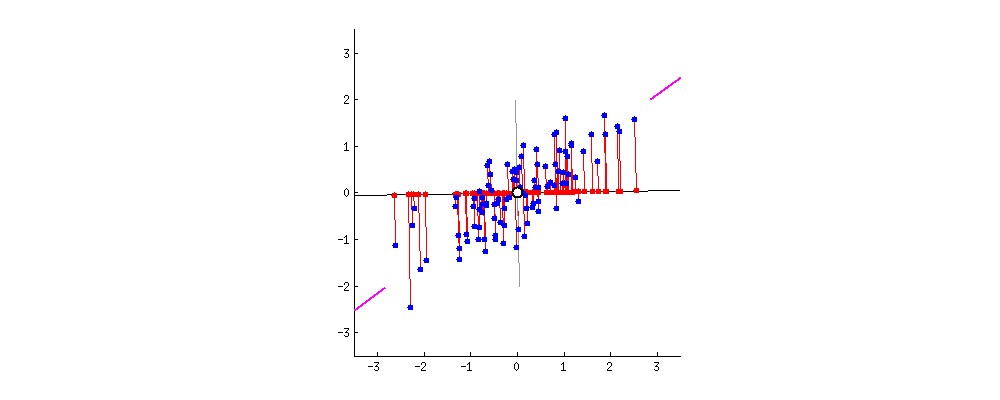

**Quantos componentes escolher para meu conjunto de dados?**

Vamos visualizar como ficaria caso aumentasse meu número de componentes principais a variância explicada

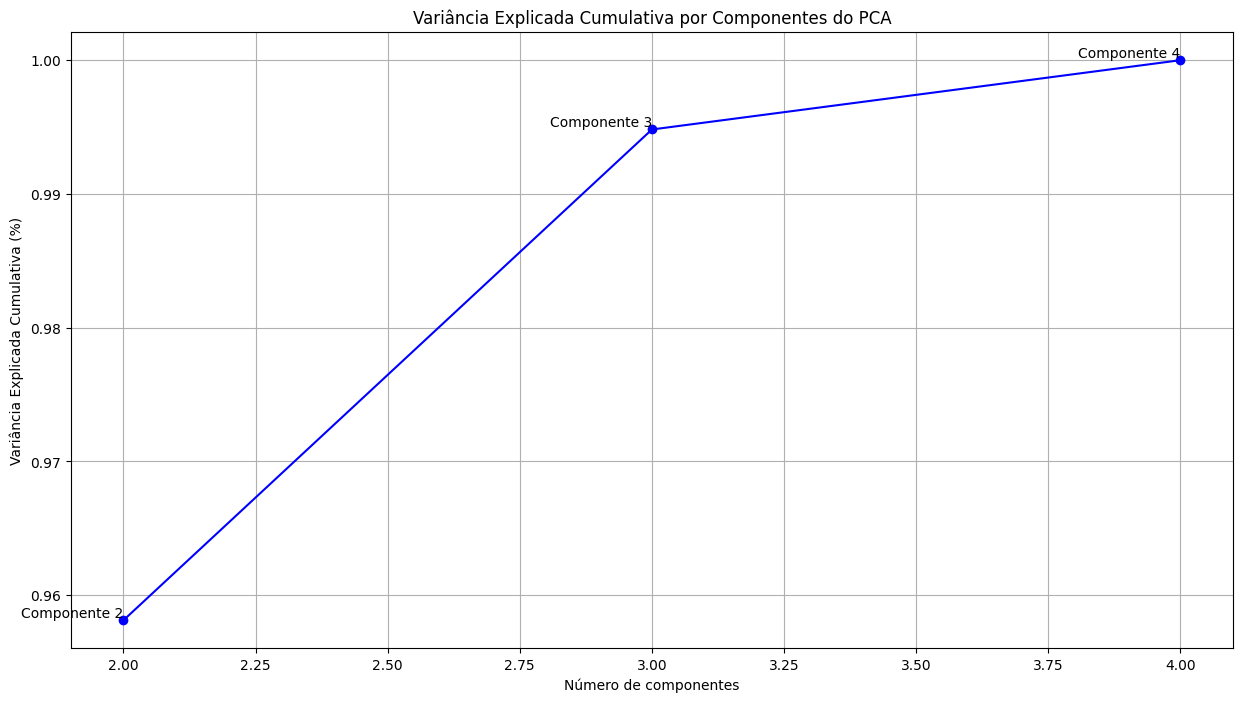

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crie uma lista para armazenar os resultados
results = []
# Dados de exemplo (substitua pelo seu conjunto de dados X)
X = df_padronizado
# Faça um loop de 2 a 4 componentes
for n in range(2, 5):
  # Crie o objeto PCA
  pca = PCA(n_components=n)
  # Ajuste o PCA aos seus dados
  pca.fit(X)
  # Calcule a variância explicada cumulativa e adicione aos resultados
  explained_variance = np.sum(pca.explained_variance_ratio_)
  results.append(explained_variance)

# Crie o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(2, 5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Número de componentes')
plt.ylabel('Variância Explicada Cumulativa (%)')
plt.title('Variância Explicada Cumulativa por Componentes do PCA')
plt.grid(True)

# Adicione rótulos aos pontos de dados
for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
  plt.text(n_components, explained_var, f'Componente {n_components}', ha='right', va='bottom')

plt.show()

Ao utilizar o PCA, você decide quantos componentes principais manter dos seus dados originais. A escolha depende de equilibrar a simplificação dos dados com a retenção da informação. Geralmente, você opta por um número que capture uma grande parte da variabilidade dos dados, como 95% ou 99%, evitando incluir componentes desnecessários. A decisão final depende das necessidades do seu projeto e dos objetivos específicos de análise.

**Exercício prático**

**Dataset sobre atributos dos jogadores no jogo eletrônico de esporte FIFA 2022**  

In [ ]:
# Assim consegue visualizar todas as colunas, sem comprimir
pd.set_option('display.max_columns', None)

In [ ]:
# Vamos carregar o arquivo csv em nosso drive e analisarmos o nosso dataframe
df_fifa = pd.read_csv("players_22.csv")
df_fifa

<ipython-input-13-a9380b9cead4>:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fifa = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [ ]:
df_fifa.shape

(19239, 110)

In [ ]:
# Analisando informações básicas sobre nosso dataframe como tipos de variáveis, tamanho, amostra estratítica básica, etc
display(df_fifa.describe())

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [ ]:
print("Informações sobre o DataFrame df_fifa:")
print(df_fifa.info())

Informações sobre o DataFrame df_fifa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None


Temos muitas variáveis como analisamos, suponha que preciso treinar um modelo de clustering com este conjunto de dados, é crucial reduzir a dimensionalidade. Isso ajuda o modelo a focar nos aspectos mais relevantes, simplificando a interpretação e destacando padrões significativos. Vamos então analisar se realmente podemos aplicar o PCA em nossos dados.

**Matriz de correlação**

A matriz de correlação é como um mapa que nos mostra o quão próximo ou distante diferentes variáveis estão umas das outras em um conjunto de dados. Vamos gerar uma com nossos dados para entender melhor seu funcionamento.

In [ ]:
# Criando dataframe somente com nossas variáveis numericas
df_fifa_numerico = df_fifa.select_dtypes([np.number])

# Calcula a matriz de correlação
correlation_matrix = df_fifa_numerico.corr()
correlation_matrix

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,1.000000,-0.491523,0.037576,-0.128102,-0.253044,-0.781023,-0.100362,-0.207461,0.110305,-0.036769,0.183841,0.128058,0.065832,-0.009138,0.179041,-0.121359,-0.139709,-0.334292,-0.113962,0.162743,-0.301698,-0.412920,-0.296408,-0.234020,-0.403516,-0.166999,-0.126239,-0.149084,-0.183969,-0.197351,-0.085064,-0.212534,-0.230161,-0.229260,-0.142978,0.103243,0.101162,-0.059928,-0.482973,0.015254,-0.327861,-0.222044,-0.115509,-0.305497,-0.203978,-0.246133,-0.173451,-0.135519,-0.267625,-0.182124,-0.420836,-0.161311,-0.094413,-0.078453,-0.105188,-0.108329,-0.106830,-0.114416,-0.106377,-0.431193
overall,-0.491523,1.000000,0.644275,0.554684,0.601764,0.459451,0.042787,0.150324,-0.226640,-0.179032,-0.186166,0.184987,-0.168315,-0.214303,-0.116020,0.223762,0.376226,0.470647,0.545197,0.174695,0.489623,0.715001,0.666402,0.346760,0.529234,0.401356,0.338746,0.343901,0.516788,0.380942,0.384351,0.420423,0.381030,0.498216,0.460411,0.194044,0.205736,0.270279,0.871823,0.123700,0.561180,0.284689,0.385150,0.364366,0.410010,0.400161,0.316470,0.358562,0.523025,0.343690,0.708867,0.312093,0.259773,0.233589,-0.010990,-0.011080,-0.012986,-0.002485,-0.007960,0.499533
potential,0.037576,0.644275,1.000000,0.527738,0.497611,-0.264142,0.004403,-0.016912,-0.330928,-0.153075,0.009784,0.345188,-0.247198,-0.185054,-0.027984,0.157053,0.283746,0.357283,0.537715,0.258817,0.287862,0.437655,0.490270,0.162151,0.155740,0.243757,0.230814,0.192825,0.367162,0.235766,0.311396,0.270217,0.207769,0.324791,0.347172,0.232621,0.235577,0.223385,0.522483,0.136890,0.332292,0.096992,0.199743,0.073567,0.243294,0.191501,0.157728,0.233070,0.345298,0.208062,0.426790,0.161288,0.156649,0.140869,-0.043093,-0.044989,-0.047030,-0.040184,-0.042383,0.230408
value_eur,-0.128102,0.554684,0.527738,1.000000,0.823527,0.042886,0.010291,0.035188,-0.191468,-0.117917,-0.067670,0.217051,-0.083983,-0.084325,-0.017193,0.149757,0.257232,0.632181,0.995460,0.181934,0.290294,0.404774,0.404812,0.147359,0.215105,0.227414,0.217691,0.165921,0.297419,0.238366,0.240916,0.252820,0.214721,0.278721,0.269854,0.157690,0.164682,0.176597,0.492741,0.117887,0.301723,0.118294,0.198771,0.128684,0.231585,0.183251,0.141060,0.224097,0.324453,0.196231,0.389065,0.140981,0.120724,0.103512,-0.022090,-0.022474,-0.021599,-0.021292,-0.019929,0.204340
wage_eur,-0.253044,0.601764,0.497611,0.823527,1.000000,0.158490,0.028062,0.066208,-0.240514,-0.126592,-0.069797,0.187222,-0.092472,-0.105601,-0.100610,0.160240,0.272319,0.675637,0.821330,0.134479,0.312219,0.438336,0.421867,0.178856,0.249843,0.253123,0.229687,0.207326,0.324420,0.264481,0.255204,0.281428,0.245725,0.310768,0.293376,0.133496,0.142775,0.171261,0.539616,0.105672,0.344529,0.148923,0.199667,0.162081,0.257850,0.225225,0.170430,0.240612,0.347141,0.228939,0.437174,0.169093,0.144442,0.125646,-0.024234,-0.024443,-0.024328,-0.022675,-0.022762,0.280131
age,-0.781023,0.459451,-0.264142,0.042886,0.158490,1.000000,0.083009,0.239444,0.089276,-0.054432,-0.209275,-0.216373,0.060287,-0.006803,-0.192085,0.082149,

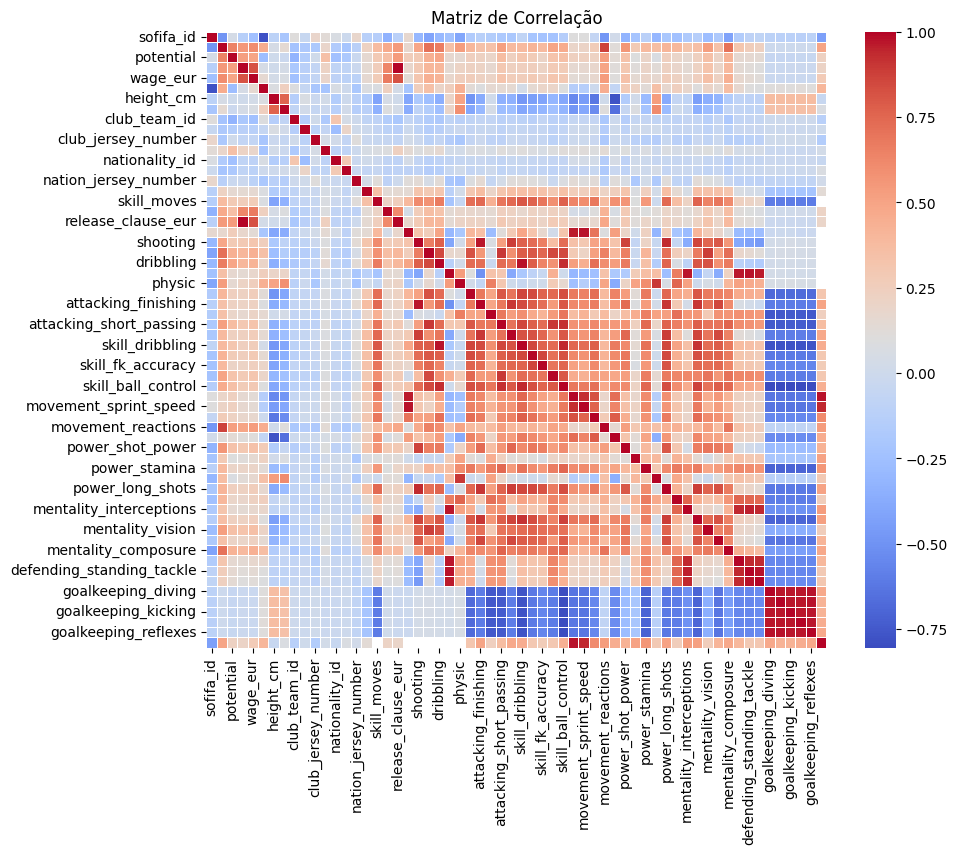

In [ ]:
import seaborn as sns
# Visualização da matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Em cada célula dessa tabela, temos um número que varia de -1 a 1, representando o quão forte é a relação entre duas variáveis. Um número próximo de 1 sugere uma forte conexão positiva, enquanto um número próximo de -1 indica uma forte conexão negativa. Aquela linha diagonal que sempre contém o número 1? Bem, ela mostra que uma variável é perfeitamente relacionada consigo mesma.

Ao examinarmos a matriz de correlação, analisamos as interações entre as variáveis de forma mais detalhada. Essa análise é crucial ao considerar a aplicação da Análise de Componentes Principais (PCA), que procura identificar relações lineares entre variáveis. A matriz de correlação atua como uma ferramenta que evidencia essas conexões. Quando as variáveis estão alinhadas de maneira coesa, o PCA desempenha um papel semelhante ao de um guia turístico, simplificando a exploração do conjunto de dados. No entanto, se as variáveis seguem caminhos independentes, outras estratégias de redução de dimensionalidade podem ser mais apropriadas.



In [ ]:
# Vamos verificar quantidades de nulos em nosso dataframe, não podemos aplicar o PCA
# se nossos dados tiverem linhas nulas, devemos tratar esses casos caso ocorram.
# Existem diversas técnicas para tratar dados nulos, o método de escolha depende muito do seu objetivo
df_fifa_numerico.isnull().sum()

sofifa_id                          0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
league_level                      61
club_jersey_number                61
club_contract_valid_until         61
nationality_id                     0
nation_team_id                 18480
nation_jersey_number           18480
weak_foot                          0
skill_moves                        0
international_reputation           0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
a

In [ ]:
from sklearn.impute import SimpleImputer
# Preenche os valores NaN com a média das colunas
imputer = SimpleImputer(strategy='mean')
df_fifa_numerico = pd.DataFrame(imputer.fit_transform(df_fifa_numerico), columns=df_fifa_numerico.columns)

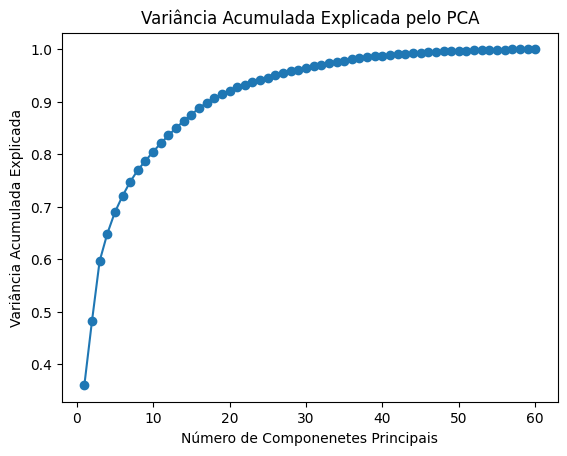

In [ ]:
# Padroniza as variáveis
scaler = StandardScaler()
df_fifa_padronizado = scaler.fit_transform(df_fifa_numerico)

# Calcula a variância explicada acumulada
pca = PCA()
pca.fit(df_fifa_padronizado)
variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)

# Visualização da variância explicada acumulada
plt.plot(range(1, len(variancia_cumulativa) + 1), variancia_cumulativa, marker='o')
plt.xlabel('Número de Componenetes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()

In [ ]:
# Vamos definir um limiar de 80%, ou seja, queremos obter uma porcentagem de variÂncia explicada sobre nossos dados de 80%.
limiar_de_variancia = 0.80

# Encontrar o número de componenentes necessários para atingir ou ultrapassar o limiar
num_de_pca = np.argmax(variancia_cumulativa >= limiar_de_variancia) + 1

print(f"Número de Componentes para {limiar_de_variancia * 100}% da Variância: {num_de_pca}")

Número de Componentes para 80.0% da Variância: 10


In [ ]:
# Aplicamos o PCA para colunas numéricas - vamos reduzir as 59 colunas numéricas para 10

# Inicializa o objeto PCA
pca = PCA(n_components=num_de_pca)

# Aplica o PCA aos dados padronizados
principal_components = pca.fit_transform(df_fifa_padronizado)

In [ ]:
# Exibe a proporção de variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.35987355 0.12243569 0.1141741  0.05223797 0.04113113 0.03103841
 0.02685167 0.02241938 0.01769125 0.01716936]


In [ ]:
# Pegando o número de componentes principais gerados
num_compoenets = principal_components.shape[1]

# Gerando uma lista para cada PCA
column_names = [f'PC{i}' for i in range(1, num_compoenets +1)]

# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
pca_df = pd.DataFrame(data=principal_components, columns=column_names)

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,14.210223,-5.162174,15.409326,7.898242,6.241436,-1.627058,10.319434,6.941714,-1.289728,0.118649
1,13.364274,-1.849444,17.164785,7.800618,10.647970,-1.104590,11.946824,7.244304,-3.008568,0.401465
2,12.759237,-2.929503,14.784400,1.972490,5.180089,1.449525,7.767478,6.638967,-0.651647,1.558855
3,14.604426,-5.226386,16.436672,12.085279,9.631408,-1.890179,12.607139,7.853536,-3.339763,0.152806
4,14.900056,-1.102360,18.030161,11.889448,9.217504,-3.471454,11.882065,7.513793,-3.109358,1.510479
...,...,...,...,...,...,...,...,...,...,...
19234,-3.418274,-0.205323,-4.833250,-0.006259,-0.897375,-0.785270,3.205689,0.781441,0.367548,-0.083456
19235,-2.478846,-0.706803,-4.226922,0.452664,-0.172145,-1.641614,0.657500,1.800430,0.518325,-0.066363
19236,-3.223077,-0.245022,-4.575274,-0.289117,0.017355,-1.180891,1.695893,1.310375,0.174818,-0.220814
19237,-3.852230,-4.177901,-5.051817,-0.211494,0.985801,0.019947,2.005030,2.054346,0.263454,-0.141770


**Verificando normalidade após o PCA**

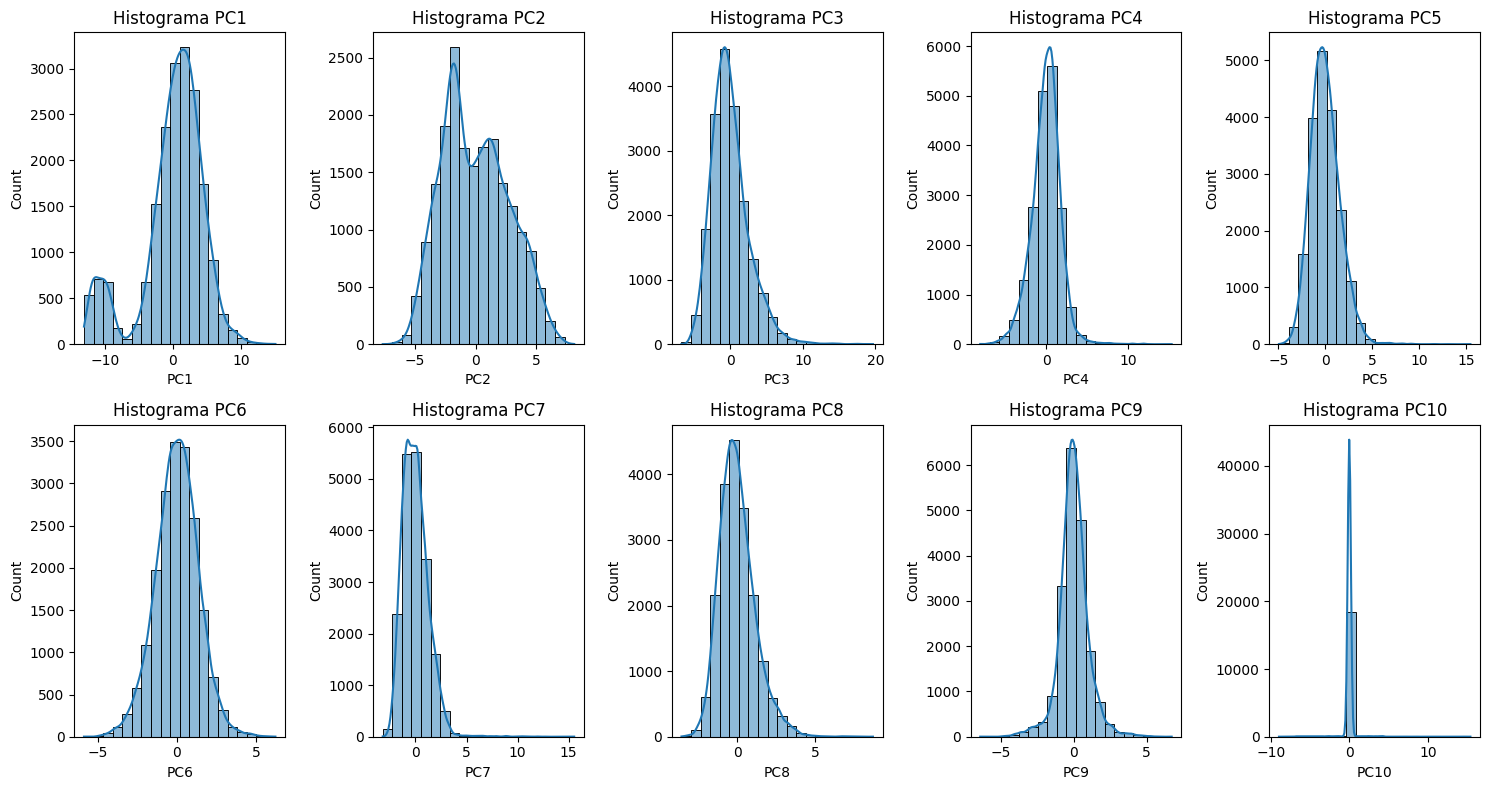

In [ ]:
# Criar histogramas para cada coluna
plt.figure(figsize=(15, 8))
for i, col in enumerate(pca_df.columns[:10]):
  plt.subplot(2, 5, i + 1)    # Aqui ajustado para 2 linhas e 5 colunas
  sns.histplot(pca_df[col], bins=20, kde=True)
  plt.title(f'Histograma {col}')
plt.tight_layout()
plt.show()

Se as distribuições das suas variáveis (PC1 a P10) não seguem uma curva gaussiana (distribuição normal), isso pode impactar a interpretação de algumas análises estatísticas que pressupõem normalidade. Entretanto, nem sempre é necessário que os dados sigam uma distribuição normal, especialmente se você estiver utilizando métodos não paramétricos ou técnicas robustas que não dependem dessa suposição.

In [ ]:
from scipy.stats import shapiro

# Vamos olhar para cada coluna a normalidade após a redução de dimensionalidade
for column in pca_df.columns:
  stat, p_value = shapiro(pca_df[column])
  print(f'Variável: {column}, Estatística de teste: {stat}, Valor p: {p_value}')

  # Você pode então interpretar o valor p para determinar se a variável segue uma distribuição normal
  if p_value > 0.05:        #0.05 é um valor padrão para esse tipo de decisão
    print(f'A variável {column} parece seguir uma distribuição normal.\n')
  else:
    print(f'A variável {column} não parece seguir uma distribuição normal.\n')

Variável: PC1, Estatística de teste: 0.9113912582397461, Valor p: 0.0
A variável PC1 não parece seguir uma distribuição normal.

Variável: PC2, Estatística de teste: 0.9811716675758362, Valor p: 5.465064010866787e-44
A variável PC2 não parece seguir uma distribuição normal.

Variável: PC3, Estatística de teste: 0.9477245211601257, Valor p: 0.0
A variável PC3 não parece seguir uma distribuição normal.

Variável: PC4, Estatística de teste: 0.97259122133255, Valor p: 0.0
A variável PC4 não parece seguir uma distribuição normal.

Variável: PC5, Estatística de teste: 0.9776812195777893, Valor p: 0.0
A variável PC5 não parece seguir uma distribuição normal.

Variável: PC6, Estatística de teste: 0.9974372386932373, Valor p: 1.658264690416693e-17
A variável PC6 não parece seguir uma distribuição normal.

Variável: PC7, Estatística de teste: 0.9399926662445068, Valor p: 0.0
A variável PC7 não parece seguir uma distribuição normal.

Variável: PC8, Estatística de teste: 0.9687146544456482, Valor 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Próximos passos**

Muitos algoritmos de clustering, como o K-Means, assumem que os dados seguem uma distribuição esférica e têm variação constante em todas as direções. Se as variáveis que você está usando para clustering não seguem uma distribuição normal, isso pode afetar a performance do algoritmo.

No entanto, vale ressaltar que a sensibilidade dos algoritmos de cluster à normalidade dos dados pode variar. Alguns algoritmos, como o K-Means, podem ser sensíveis à escala e formato dos clusters. Outros algoritmos, como o DBSCAN (Density-Based Spatial Clustering of Applications with Noise), são mais flexíveis em relação à forma e densidade dos clusters.